<a href="https://colab.research.google.com/github/kweenkeen/ReachOutandRead/blob/main/Programmatic_Contacts_Sheet_Impact_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install openpyxl --upgrade

In [1]:
!pip install xlsxwriter
!pip install openpyxl

import pandas as pd
from datetime import date
import zipfile
from google.colab import files
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import datetime
from datetime import date
from datetime import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 18.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# UPLOAD PROVIDER TRAINING FILES (AFFILIATE CONTACT REPORT)
provider_training_report = files.upload()

Saving MyROR Contact report 2022-09-15.xlsx to MyROR Contact report 2022-09-15.xlsx


In [3]:
# Read in name of file, and set that to variable
provider_filename = next(iter(provider_training_report))
df = pd.read_excel(provider_filename, converters={'Site ID': str})

# Add in column to do a 'VLOOKUP'
df['Affiliate Name'] = ''

In [4]:
site_data_report = files.upload()
site_data_filename = next(iter(site_data_report))
site_data_df = pd.read_excel(site_data_filename, converters={'Site ID': str})

Saving MyROR Site Data Report 2022-09-15.xlsx to MyROR Site Data Report 2022-09-15.xlsx


In [5]:
today = str(date.today())
filename = 'Programmatic_Contacts_' + today + '.xlsx'
writer = pd.ExcelWriter(filename, engine='xlsxwriter')

In [6]:
# APPLY FILTERS

# Filter for high level active sites
high_level_active = ['Active', 'Active - Non-Reporting', 'Slated for deactivation', 'COVID-19 Freeze'] 
df = df[df['Status'].isin(high_level_active)] 
site_data_df = site_data_df[site_data_df['Status'].isin(high_level_active)]

# Drop duplicates
df = df.drop_duplicates(subset=['Contact ID'])

In [7]:
df = df.set_index('Site ID')
df2 = site_data_df
df2 = df2.set_index('Site ID')

In [8]:
# XLOOKUP FOR AFFILIATE NAME (takes about 2 minutes)

for i, rows in df.iterrows():
  print(i)
  df.loc[i, 'Affiliate Name'] = df2.loc[i, 'Affiliate Name']

Streaming output truncated to the last 5000 lines.
17471
17471
17471
17471
17473
17473
17473
17485
17485
17485
17485
17492
17492
17492
17492
17492
17492
17492
17492
17492
17492
17495
17495
17495
17495
17504
17504
17504
17504
17504
17504
17504
17504
17507
17507
17507
17508
17508
17508
17508
17508
17508
17508
17508
17508
17508
17508
17508
17508
17508
17521
17521
17522
17522
17522
17522
17522
17522
17522
17522
17522
17522
17522
17522
17522
17526
17526
17526
17526
17526
17530
17530
17530
17530
17530
17530
17530
17530
17531
17531
17531
17531
17531
17531
17531
17531
17531
17531
17531
17537
17537
17537
17551
17551
17558
17558
17558
17558
17558
17558
17558
17558
17573
17573
17573
17576
17576
17576
17576
17576
17578
17578
17578
17583
17592
17592
17592
17592
17592
17592
17595
17595
17595
17595
17595
17595
17595
17595
17595
17599
17599
17599
17599
17599
17601
17601
17601
17601
17601
17608
17608
17608
17608
17608
17608
17608
17608
17608
17610
17610
17610
17623
17623
17623
17628
17628
17628
17628
1

In [9]:
df.head()

,Site Type,Site Name,Status,Legacy Satellite ID,Site County,Site State,Site Country,Date Added,Contact ID,Position,...,Alternate Site Contact,Most Recent Completion Date,Completed Version 1,Completed Version 2,Completed Version 3,Completed Version 3_rev1,ABP ID Number,0-5 month Expansion Training Completed,0-5 month Expansion Training Completion Date,Affiliate Name
Site ID,,,,,,,,,,,,,,,,,,,,,
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2011-09-29,80432,Medical Provider,...,N,2013-07-11,Y,N,N,N,NaN,N,NaT,Reach Out and Read Alabama
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2021-09-02,182860,Medical Provider,...,N,2021-10-26,N,N,Y,N,716398,N,NaT,Reach Out and Read Alabama
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2022-08-15,193168,Medical Provider,...,N,NaT,N,N,N,N,NaN,N,NaT,Reach Out and Read Alabama
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2014-09-11,109457,Medical Provider,...,N,2014-09-15,Y,N,N,N,NaN,N,NaT,Reach Out and Read Alabama
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2020-07-23,171045,Medical Provider,...,N,2020-07-28,N,Y,N,N,NaN,N,NaT,Reach Out and Read Alabama


In [10]:
provider_type_df = df['Position'].value_counts().rename_axis('Position').reset_index(name='Count of Contact ID')

In [11]:
provider_type_df.head()

,Position,Count of Contact ID
0,Medical Provider,33269
1,Medical Consultant,4318
2,On-Site Coordinator,4076
3,Site Support,2657
4,Clinic Manager,636


In [12]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
# writer = pd.ExcelWriter('Prog_Contacts.xlsx', engine='xlsxwriter')

In [13]:
provider_type_df.to_excel(writer, sheet_name = "Contacts Listed")

In [14]:
df['Online Training Date'] = pd.to_datetime(df['Online Training Date'], format='%Y-%m-%d')

In [15]:
training_date_range_min = input("Type in the start of your year (MM/DD/YYYY): ")
training_date_range_min = datetime.strptime(training_date_range_min, '%m/%d/%Y')
training_date_range_max = input("Type in the end of your year (MM/DD/YYYY): ")
training_date_range_max = datetime.strptime(training_date_range_max, '%m/%d/%Y')

Type in the start of your year (MM/DD/YYYY): 07/01/2021
Type in the end of your year (MM/DD/YYYY): 06/30/2022


In [16]:
filtered_df = df.loc[(df['Online Training Date'] >= training_date_range_min)
                     & (df['Online Training Date'] <= training_date_range_max)]

In [17]:
filtered_df.head()

,Site Type,Site Name,Status,Legacy Satellite ID,Site County,Site State,Site Country,Date Added,Contact ID,Position,...,Alternate Site Contact,Most Recent Completion Date,Completed Version 1,Completed Version 2,Completed Version 3,Completed Version 3_rev1,ABP ID Number,0-5 month Expansion Training Completed,0-5 month Expansion Training Completion Date,Affiliate Name
Site ID,,,,,,,,,,,,,,,,,,,,,
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2021-09-02,182860,Medical Provider,...,N,2021-10-26,N,N,Y,N,716398,N,NaT,Reach Out and Read Alabama
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2020-07-23,171046,Medical Provider,...,N,2021-10-03,N,N,Y,N,NaN,N,NaT,Reach Out and Read Alabama
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2020-07-23,171047,Medical Provider,...,N,2021-07-20,N,N,Y,N,113739,N,NaT,Reach Out and Read Alabama
2,Primary,UAB Primary Care Clinic /,Active,NaN,Jefferson,AL,US,2019-02-21,157299,Medical Provider,...,N,2021-09-11,N,N,Y,N,693153,N,NaT,Reach Out and Read Alabama
29,Primary,Valleywise Community Health Center- Avondale /,Active,NaN,Maricopa,AZ,US,2019-10-23,164767,Medical Provider,...,N,2021-11-21,N,N,Y,N,NaN,N,NaT,Reach Out and Read Arizona


In [18]:
if 'Training Required' in df.columns:
  training_required_by_affiliate_df = pd.crosstab(filtered_df['Affiliate Name'], filtered_df['Training Required']) 
elif 'Training Required?' in df.columns:
  training_required_by_affiliate_df = pd.crosstab(filtered_df['Affiliate Name'], filtered_df['Training Required?'])
else:
  print("Error! This spreadsheet does not include Training Required as a field")

In [19]:
training_required_by_affiliate_df.head()

Training Required?,N,Y
Affiliate Name,,
Delaware (TIROS 1),0,1
Idaho (Curiosity Rover),5,18
Independent / International,203,354
Michigan (Mars Pathfinder),29,61
PA (excluding Greater Philadelphia),42,107


In [20]:
All_contacts = training_required_by_affiliate_df.sum(axis = 1)
print(All_contacts)
required_to_train = training_required_by_affiliate_df['Y']

training_required_by_affiliate_df['Required tp Train'] = required_to_train
training_required_by_affiliate_df['All Contacts'] = All_contacts

Affiliate Name
Delaware (TIROS 1)                                            1
Idaho (Curiosity Rover)                                      23
Independent / International                                 557
Michigan (Mars Pathfinder)                                   90
PA (excluding Greater Philadelphia)                         149
Reach Out and Read Alabama                                   66
Reach Out and Read Arizona                                  109
Reach Out and Read Bay Area                                  37
Reach Out and Read Colorado                                 339
Reach Out and Read Connecticut                              121
Reach Out and Read Florida (excluding Palm Beach County)    246
Reach Out and Read Georgia                                  120
Reach Out and Read Greater New York                         142
Reach Out and Read Greater Philadelphia                     257
Reach Out and Read Illinois                                 228
Reach Out and Read Indian

In [21]:
training_required_by_affiliate_df.head()

Training Required?,N,Y,Required tp Train,All Contacts
Affiliate Name,,,,
Delaware (TIROS 1),0,1,1,1
Idaho (Curiosity Rover),5,18,18,23
Independent / International,203,354,354,557
Michigan (Mars Pathfinder),29,61,61,90
PA (excluding Greater Philadelphia),42,107,107,149


In [22]:
training_required_by_affiliate_df.to_excel(writer, sheet_name = "Training Required by Affiliate")

In [23]:
if 'Training Required' in df.columns:
  training_required_by_state_df = pd.crosstab(df['State'], df['Training Required']) 
elif 'Training Required?' in df.columns:
  training_required_by_state_df = pd.crosstab(df['State'], df['Training Required?'])
else:
  print("Error! This spreadsheet does not include Training Required as a field")

In [24]:
training_required_by_state_df.to_excel(writer, sheet_name = "Training Required by State")

In [25]:
training_required_by_state_df.head()

Training Required?,N,Y
State,,
AE,1,2
AK,20,53
AL,24,127
AP,0,2
AR,20,63


In [26]:
# Filter by 'Yes' for Training Required
training_required = ['Yes', 'Y'] 

if 'Training Required' in df.columns:
  df = df[df['Training Required'].isin(training_required)] 
elif 'Training Required?' in df.columns:
  df = df[df['Training Required?'].isin(training_required)]
else:
  print("Error! This spreadsheet does not include Training Required as a field")

In [27]:
df['Completed Version 1'].value_counts()

N    21638
Y     9266
Name: Completed Version 1, dtype: int64

In [28]:
df['Completed Version 2'].value_counts()

N    21807
Y     9097
Name: Completed Version 2, dtype: int64

In [29]:
df['Completed Version 3'].value_counts()

N    28106
Y     2798
Name: Completed Version 3, dtype: int64

In [30]:
df['Completed Version 3_rev1'].value_counts()

N    27155
Y     3749
Name: Completed Version 3_rev1, dtype: int64

In [31]:
df = df.reset_index()

In [32]:
count_version_1 = 0
count_version_2 = 0
count_version_3 = 0
count_version_1_and_2 = 0
count_version_1_and_3 = 0
count_version_2_and_3 = 0
count_version_1_and_2_and_3 = 0
count_not_taken = 0

for ind, row in df.iterrows():
  if df.loc[ind, 'Completed Version 1'] == 'Y' and df.loc[ind, 'Completed Version 2'] == 'N' and df.loc[ind, 'Completed Version 3'] == 'N' and df.loc[ind, 'Completed Version 3_rev1'] == 'N':
    count_version_1 += 1
  if df.loc[ind, 'Completed Version 1'] == 'N' and df.loc[ind, 'Completed Version 2'] == 'Y' and df.loc[ind, 'Completed Version 3'] == 'N' and df.loc[ind, 'Completed Version 3_rev1'] == 'N':
    count_version_2 += 1
  if df.loc[ind, 'Completed Version 1'] == 'N' and df.loc[ind, 'Completed Version 2'] == 'N' and (df.loc[ind, 'Completed Version 3'] == 'Y' or df.loc[ind, 'Completed Version 3_rev1'] == 'Y'):
    count_version_3 += 1
  if df.loc[ind, 'Completed Version 1'] == 'Y' and df.loc[ind, 'Completed Version 2'] == 'Y' and (df.loc[ind, 'Completed Version 3'] == 'N' and df.loc[ind, 'Completed Version 3_rev1'] == 'N'):
    count_version_1_and_2 += 1
  if df.loc[ind, 'Completed Version 1'] == 'Y' and df.loc[ind, 'Completed Version 2'] == 'N' and (df.loc[ind, 'Completed Version 3'] == 'Y' or df.loc[ind, 'Completed Version 3_rev1'] == 'Y'):
    count_version_1_and_3 += 1
  if df.loc[ind, 'Completed Version 1'] == 'N' and df.loc[ind, 'Completed Version 2'] == 'Y' and (df.loc[ind, 'Completed Version 3'] == 'Y' or df.loc[ind, 'Completed Version 3_rev1'] == 'Y'):
    count_version_2_and_3 += 1
  if df.loc[ind, 'Completed Version 1'] == 'Y' and df.loc[ind, 'Completed Version 2'] == 'Y' and (df.loc[ind, 'Completed Version 3'] == 'Y' or df.loc[ind, 'Completed Version 3_rev1'] == 'Y'):
    count_version_1_and_2_and_3 += 1
  if df.loc[ind, 'Completed Version 1'] == 'N' and df.loc[ind, 'Completed Version 2'] == 'N' and (df.loc[ind, 'Completed Version 3'] == 'N' and df.loc[ind, 'Completed Version 3_rev1'] == 'N'):
    count_not_taken += 1

print("Count of just version 1: ", count_version_1)
print("Count of just version 2: ", count_version_2)
print("Count of just version 3: ", count_version_3)
print("Count of version 1 and 2: ", count_version_1_and_2)
print("Count of version 1 and 3: ", count_version_1_and_3)
print("Count of version 2 and 3: ", count_version_2_and_3)
print("Count of version 1, 2, and 3: ", count_version_1_and_2_and_3)
print("Count not taken: ", count_not_taken)

Count of just version 1:  8639
Count of just version 2:  8525
Count of just version 3:  5530
Count of version 1 and 2:  120
Count of version 1 and 3:  475
Count of version 2 and 3:  420
Count of version 1, 2, and 3:  32
Count not taken:  7163


In [33]:
# CHECKING VERSION 3 NUMBERS

count_version_3_old = 0
count_version_3_new = 0
count_version_3_both = 0

for ind, row in df.iterrows():
  if df.loc[ind, 'Completed Version 1'] == 'N' and df.loc[ind, 'Completed Version 2'] == 'N' and df.loc[ind, 'Completed Version 3'] == 'Y' and df.loc[ind, 'Completed Version 3_rev1'] == 'N':
    count_version_3_old += 1
  if df.loc[ind, 'Completed Version 1'] == 'N' and df.loc[ind, 'Completed Version 2'] == 'N' and df.loc[ind, 'Completed Version 3'] == 'N' and df.loc[ind, 'Completed Version 3_rev1'] == 'Y':
    count_version_3_new += 1
  if df.loc[ind, 'Completed Version 1'] == 'N' and df.loc[ind, 'Completed Version 2'] == 'N' and df.loc[ind, 'Completed Version 3'] == 'Y' and df.loc[ind, 'Completed Version 3_rev1'] == 'Y':
    count_version_3_both += 1

print("Count of those who have taken just version 3 (old): ", count_version_3_old)
print("Count of those who have taken just version 3 (new): ", count_version_3_new)
print("Count of those who have taken both version 3 (old and new): ", count_version_3_both)

Count of those who have taken just version 3 (old):  2505
Count of those who have taken just version 3 (new):  2963
Count of those who have taken both version 3 (old and new):  62


In [34]:
sum_of_taken = count_version_1_and_2 + count_version_1_and_3 + count_version_2_and_3 + count_version_1 + count_version_2 + count_version_3 + count_version_1_and_2_and_3
sum_of_total = sum_of_taken + count_not_taken
percent_complete = sum_of_taken/sum_of_total
print("Percent Complete: ", percent_complete)

Percent Complete:  0.7682177064457676


<Figure size 1008x432 with 0 Axes>

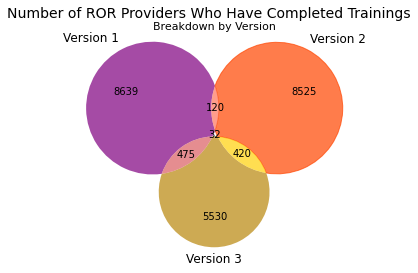

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
from matplotlib_venn import venn3, venn3_circles
from collections import Counter

from matplotlib.pyplot import figure

figure(figsize=(14, 6))

plt.figure()

sets = Counter()
sets['100'] = count_version_1
sets['001'] = count_version_3
sets['010'] = count_version_2
sets['110'] = count_version_1_and_2
sets['101'] = count_version_1_and_3
sets['011'] = count_version_2_and_3
sets['111'] = count_version_1_and_2_and_3
setLabels = ['set1', 'set2', 'set3']
plt.suptitle("Number of ROR Providers Who Have Completed Trainings", fontsize=14)
plt.title("Breakdown by Version", fontsize=11)
v = venn3(normalize_to = 10, subsets = (sets), set_labels = ("Version 1", "Version 2", "Version 3"), set_colors=("purple", "orange", "darkgoldenrod"), alpha=0.7)
v.get_patch_by_id('010').set_color('orangered')

fig1 = plt.gcf()
plt.show()
filename_venn_diagram = 'Provider_Training_By_Version_' + today + '.pdf'
fig1.savefig(filename_venn_diagram)
files.download(filename_venn_diagram)


In [36]:
training_status_df = df['Training Status'].value_counts().rename_axis('Training Status').reset_index(name='Count of Contact ID')
training_status_df.to_excel(writer, sheet_name = "Training Status - Summary") 

In [37]:
training_status_df.head()

,Training Status,Count of Contact ID
0,Completed,23741
1,Not started,6119
2,In Progress,1044


In [38]:
training_by_state_df = pd.crosstab(df['State'], df['Training Status'])

total_sum_by_state = (training_by_state_df['Completed'] + training_by_state_df['In Progress'] + training_by_state_df['Not started']  )

## ADD PERCENT COLUMNS
training_by_state_df['% Completed'] = training_by_state_df['Completed'] / total_sum_by_state
training_by_state_df['% In Progress'] = training_by_state_df['In Progress'] / total_sum_by_state
training_by_state_df['% Not started'] = training_by_state_df['Not started'] / total_sum_by_state

training_by_state_df["Total Number of Providers"] = training_by_state_df[['Completed', 'In Progress', 'Not started']].sum(axis=1)

training_by_state_df.to_excel(writer, sheet_name = "Training by State") 

In [39]:
training_by_state_df.head()

Training Status,Completed,In Progress,Not started,% Completed,% In Progress,% Not started,Total Number of Providers
State,,,,,,,
AE,1,0,1,0.500000,0.000000,0.500000,2
AK,50,1,2,0.943396,0.018868,0.037736,53
AL,93,3,31,0.732283,0.023622,0.244094,127
AP,1,0,1,0.500000,0.000000,0.500000,2
AR,29,1,33,0.460317,0.015873,0.523810,63


In [40]:
training_by_affiliate_df = pd.crosstab(df['Affiliate Name'], df['Training Status'])



total_sum_by_affiliate = (training_by_affiliate_df['Completed'] + training_by_affiliate_df['In Progress'] + training_by_affiliate_df['Not started']  )

training_by_affiliate_df['% Completed'] = training_by_affiliate_df['Completed'] / total_sum_by_affiliate
training_by_affiliate_df['% In Progress'] = training_by_affiliate_df['In Progress'] / total_sum_by_affiliate
training_by_affiliate_df['% Not started'] = training_by_affiliate_df['Not started'] / total_sum_by_affiliate

training_by_affiliate_df["Total Number of Providers"] = training_by_affiliate_df[['Completed', 'In Progress', 'Not started']].sum(axis=1)

training_by_affiliate_df.to_excel(writer, sheet_name = "Training by Affiliate") 

In [41]:
training_by_affiliate_df.head()

Training Status,Completed,In Progress,Not started,% Completed,% In Progress,% Not started,Total Number of Providers
Affiliate Name,,,,,,,
Delaware (TIROS 1),16,2,67,0.188235,0.023529,0.788235,85
Idaho (Curiosity Rover),79,7,20,0.745283,0.066038,0.188679,106
Independent / International,2011,130,935,0.653771,0.042263,0.303966,3076
Michigan (Mars Pathfinder),291,19,141,0.645233,0.042129,0.312639,451
PA (excluding Greater Philadelphia),720,25,148,0.806271,0.027996,0.165733,893


In [42]:
writer.save()
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>